In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
df = pd.read_csv("cancer patient data sets.csv") 
print("✅ Dataset Loaded Successfully!")

✅ Dataset Loaded Successfully!


In [20]:
print("\n🔹 First 5 rows:")
display(df.head())

print("\n🔹 Dataset Info:")
df.info()

print("\n🔹 Summary Statistics:")
display(df.describe())


🔹 First 5 rows:


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pa

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [21]:
print("\n🔹 Missing Values per Column:")
print(df.isnull().sum())

print("\n🔹 Duplicate Records:", df.duplicated().sum())


🔹 Missing Values per Column:
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

🔹 Duplicate Records: 0


In [22]:

df.drop_duplicates(inplace=True)

df.fillna(df.mean(numeric_only=True), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


print("\n🔹 Categorical Features:")
print(df.select_dtypes(include=['object']).columns.tolist())


🔹 Categorical Features:
['Patient Id', 'Level']


C:\Users\Naveed Sheikh\AppData\Local\Temp\ipykernel_11924\242381089.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)



🔹 Class Distribution:
Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


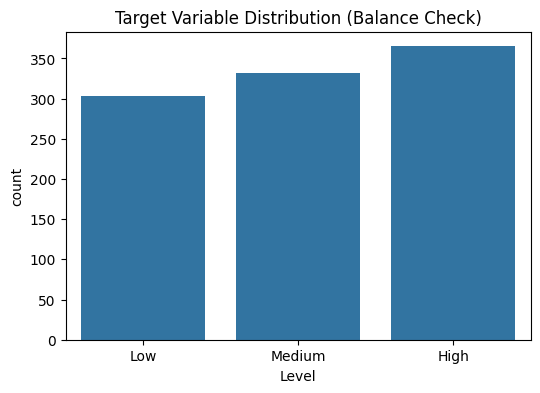

In [23]:
target_col = 'Level'  

print("\n🔹 Class Distribution:")
print(df[target_col].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Target Variable Distribution (Balance Check)")
plt.show()

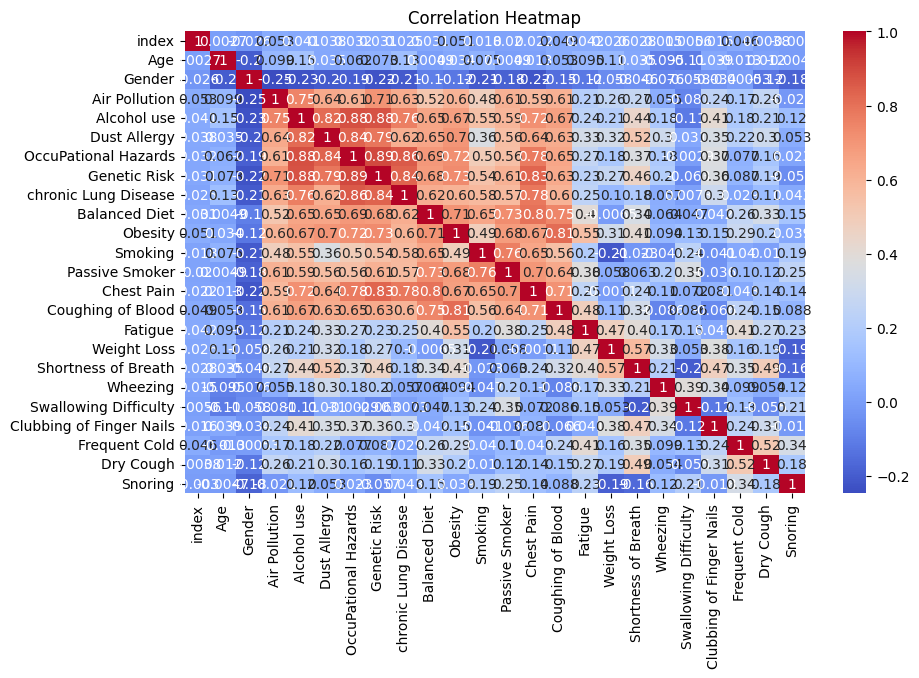

In [24]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [36]:
# Separate features and target
target_col = 'Level'  # change if your target column has a different name
X = df.drop(columns=[target_col])
y = df[target_col]

# Convert all categorical columns to numeric using One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)

print("✅ Columns after encoding:")
print(X.columns.tolist())

# Double-check no text data remains
print("\n🔹 Non-numeric columns (should be empty):")
print(X.select_dtypes(exclude=[np.number]).columns.tolist())

from sklearn.preprocessing import LabelEncoder

# Encode target labels (convert text like "High" → 0, "Medium" → 1, etc.)
le = LabelEncoder()
y = le.fit_transform(y)

print("Encoded Target Classes:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n✅ Scaling successful! Data is now numeric and standardized.")

✅ Columns after encoding:
['index', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', 'Patient Id_P10', 'Patient Id_P100', 'Patient Id_P1000', 'Patient Id_P101', 'Patient Id_P102', 'Patient Id_P103', 'Patient Id_P104', 'Patient Id_P105', 'Patient Id_P106', 'Patient Id_P107', 'Patient Id_P108', 'Patient Id_P109', 'Patient Id_P11', 'Patient Id_P110', 'Patient Id_P111', 'Patient Id_P112', 'Patient Id_P113', 'Patient Id_P114', 'Patient Id_P115', 'Patient Id_P116', 'Patient Id_P117', 'Patient Id_P118', 'Patient Id_P119', 'Patient Id_P12', 'Patient Id_P120', 'Patient Id_P121', 'Patient Id_P122', 'Patient Id_P123', 'Patient Id_P124', 'Patient Id_P125', 'Patient Id_P126', '

In [37]:
# Split the dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=0, stratify=y
)

# Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.3, random_state=0, stratify=y_train_full
)

In [38]:
metrics = ['euclidean', 'manhattan', 'minkowski']
results = []

for metric in metrics:
    print(f"\n===== 🔹 Metric: {metric.upper()} =====")
    
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    
    # Accuracy on Train, Validation, Test
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    val_acc = accuracy_score(y_val, knn.predict(X_val))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    
    print(f"Training Accuracy:  {train_acc:.4f}")
    print(f"Validation Accuracy:{val_acc:.4f}")
    print(f"Testing Accuracy:   {test_acc:.4f}")
    
    results.append([metric, train_acc, val_acc, test_acc])


===== 🔹 Metric: EUCLIDEAN =====
Training Accuracy:  1.0000
Validation Accuracy:1.0000
Testing Accuracy:   1.0000

===== 🔹 Metric: MANHATTAN =====
Training Accuracy:  1.0000
Validation Accuracy:1.0000
Testing Accuracy:   1.0000

===== 🔹 Metric: MINKOWSKI =====
Training Accuracy:  1.0000
Validation Accuracy:1.0000
Testing Accuracy:   1.0000


,Metric,Train Accuracy,Validation Accuracy,Test Accuracy
0,euclidean,1.0,1.0,1.0
1,manhattan,1.0,1.0,1.0
2,minkowski,1.0,1.0,1.0


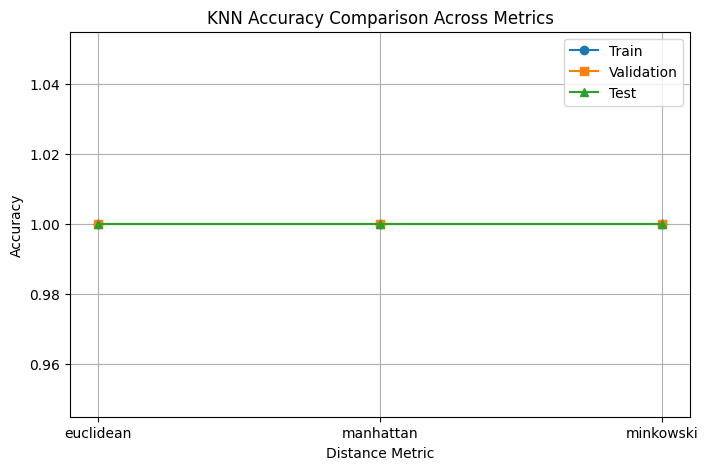

In [39]:
results_df = pd.DataFrame(results, columns=["Metric", "Train Accuracy", "Validation Accuracy", "Test Accuracy"])
display(results_df)

plt.figure(figsize=(8,5))
plt.plot(results_df["Metric"], results_df["Train Accuracy"], marker='o', label='Train')
plt.plot(results_df["Metric"], results_df["Validation Accuracy"], marker='s', label='Validation')
plt.plot(results_df["Metric"], results_df["Test Accuracy"], marker='^', label='Test')
plt.title("KNN Accuracy Comparison Across Metrics")
plt.xlabel("Distance Metric")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()